In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print(len(train_data),len(test_data))

8982 2246


In [4]:
# Decoding the newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 321us/step - loss: 2.5317 - acc: 0.4959 - val_loss: 1.7212 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 1s 182us/step - loss: 1.4460 - acc: 0.6878 - val_loss: 1.3467 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 179us/step - loss: 1.0965 - acc: 0.7651 - val_loss: 1.1722 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.8710 - acc: 0.8152 - val_loss: 1.0804 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 240us/step - loss: 0.7041 - acc: 0.8474 - val_loss: 0.9850 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 220us/step - loss: 0.5670 - acc: 0.8794 - val_loss: 0.9419 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.4586 - acc: 0.9043 - val_loss: 0.9069 - val_acc: 0.8020


In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

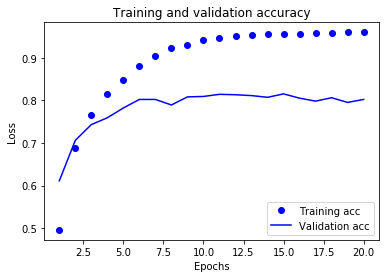

In [12]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# As we can see the model begins to overfit after 9 epochs, therefore i am training a new model with 9 epochs

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

results=model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 242us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 185us/step - loss: 1.3710 - acc: 0.7120 - val_loss: 1.2758 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 2s 202us/step - loss: 1.0135 - acc: 0.7784 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 208us/step - loss: 0.7973 - acc: 0.8256 - val_loss: 1.0542 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 206us/step - loss: 0.6392 - acc: 0.8631 - val_loss: 0.9754 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 2s 217us/step - loss: 0.5123 - acc: 0.8920 - val_loss: 0.9102 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 2s 189us/step - loss: 0.4129 - acc: 0.9142 - val_loss: 0.8925 - val_acc: 0.8210
Epoch 8

[1.024060229584243, 0.7751558326443496]

In [14]:
# generating prediction for new data

predictions = model.predict(x_test)
print(predictions)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

[[1.0260005e-05 8.5416148e-05 2.7564165e-05 ... 3.2280062e-05
  6.4654459e-06 9.3754443e-06]
 [8.2632725e-04 1.6914297e-02 3.8955552e-03 ... 6.2273117e-04
  1.3612560e-05 2.8648652e-04]
 [1.7187954e-03 7.7576983e-01 2.8072803e-03 ... 1.5190717e-04
  2.0351780e-03 2.1712085e-04]
 ...
 [1.1451837e-05 2.0925893e-04 4.1908617e-05 ... 8.7665476e-06
  1.1397703e-04 1.1752851e-05]
 [1.4535763e-03 1.2894617e-01 3.9379001e-03 ... 6.0846237e-04
  8.0321432e-04 3.9448237e-04]
 [8.4477122e-04 5.6455076e-01 1.8520750e-03 ... 4.9820472e-05
  5.1102083e-04 1.9910533e-04]]
(46,)
0.9999999
3


In [15]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)